### Based on: https://napari.org/tutorials/fundamentals/viewer.html and https://github.com/alisterburt/napari-workshops/tree/main/napari-workshops/notebooks

In [30]:
import napari
from skimage import data
from napari.utils import nbscreenshot
import numpy as np

# create the viewer and display the image
viewer = napari.view_image(data.astronaut(), rgb=True, name='astronaut')

/Users/fernandes/anaconda3/envs/napari-env/lib/python3.9/site-packages/napari_tools_menu/__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


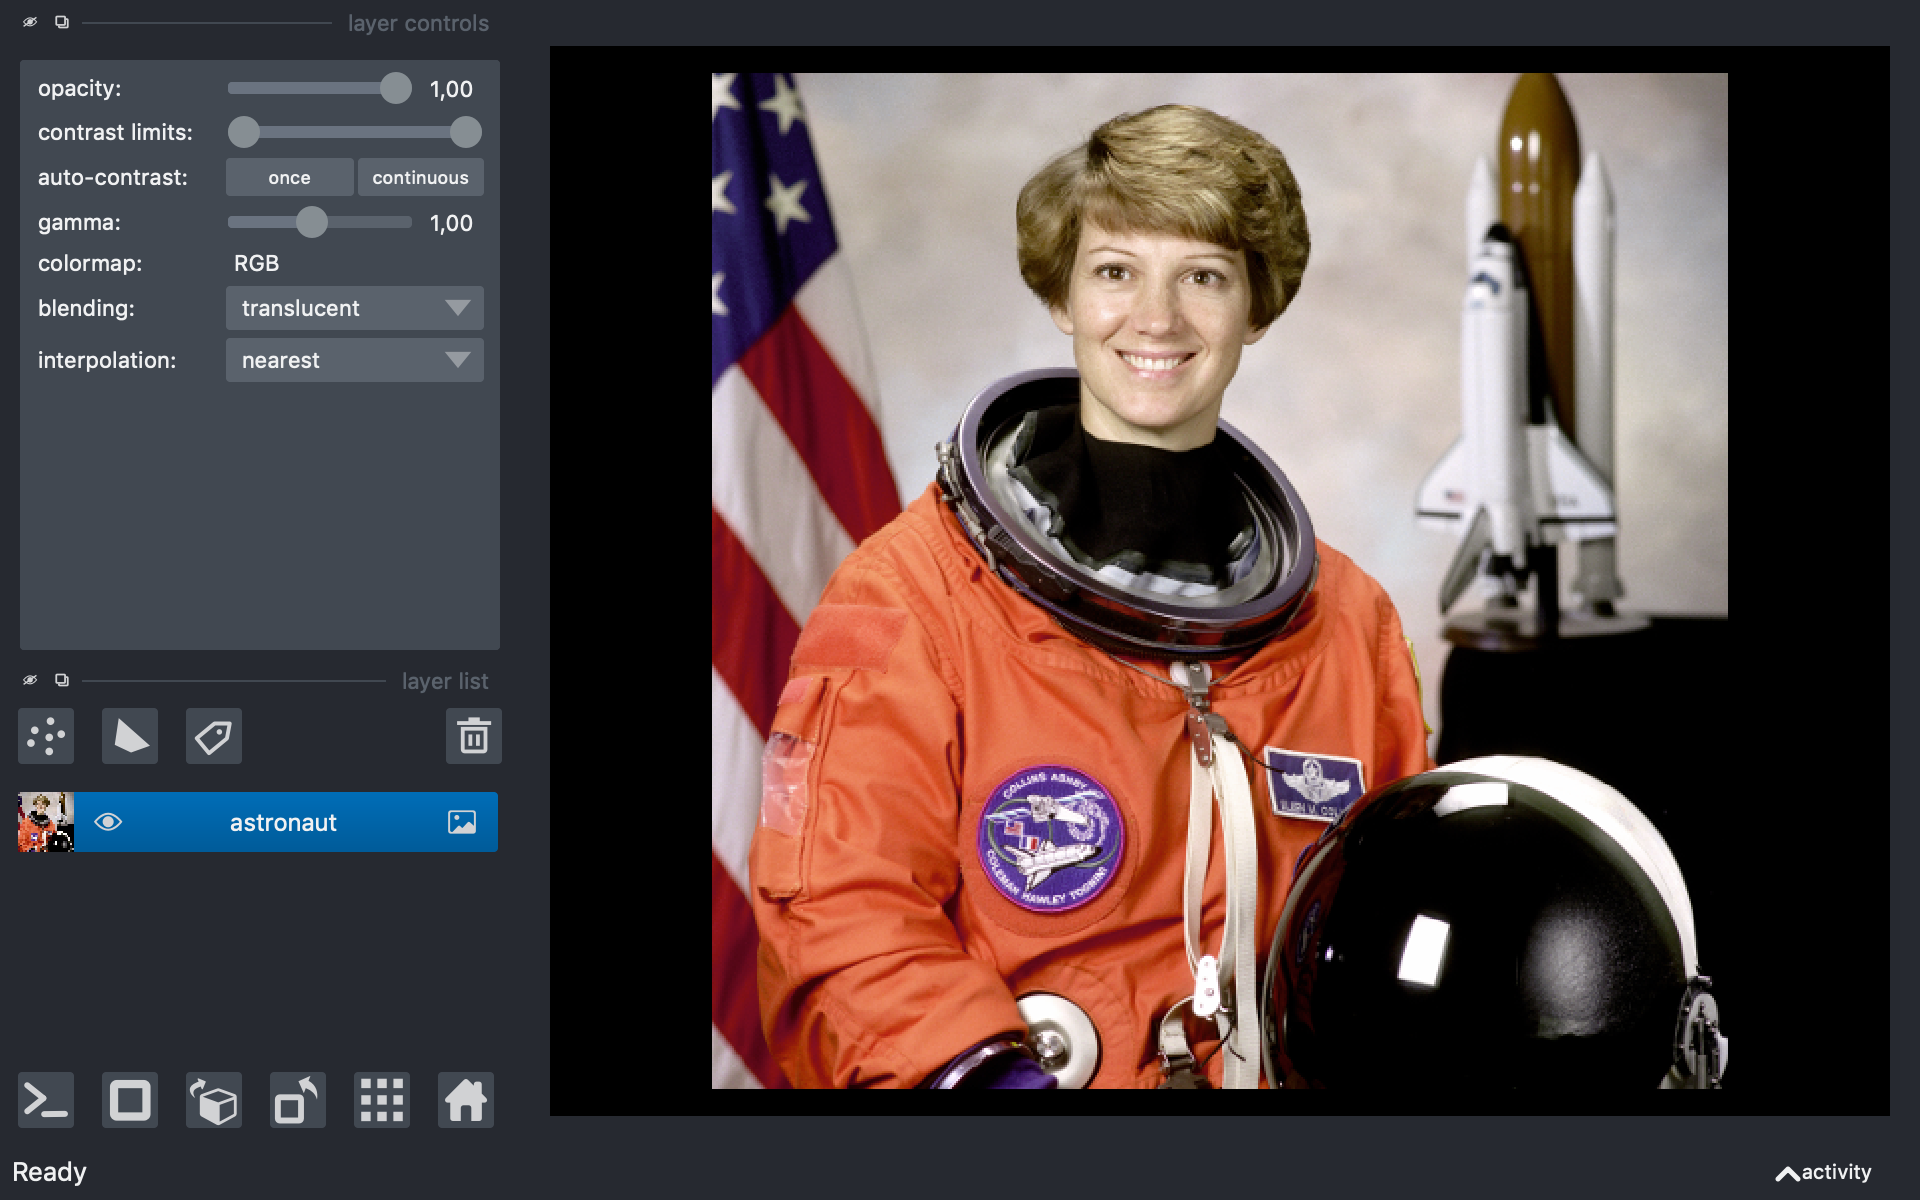

In [31]:
nbscreenshot(viewer)

In [32]:
viewer.add_image(data.moon(), name='moon')
viewer.add_image(data.camera(), name='camera')

<Image layer 'camera' at 0x1310f9040>

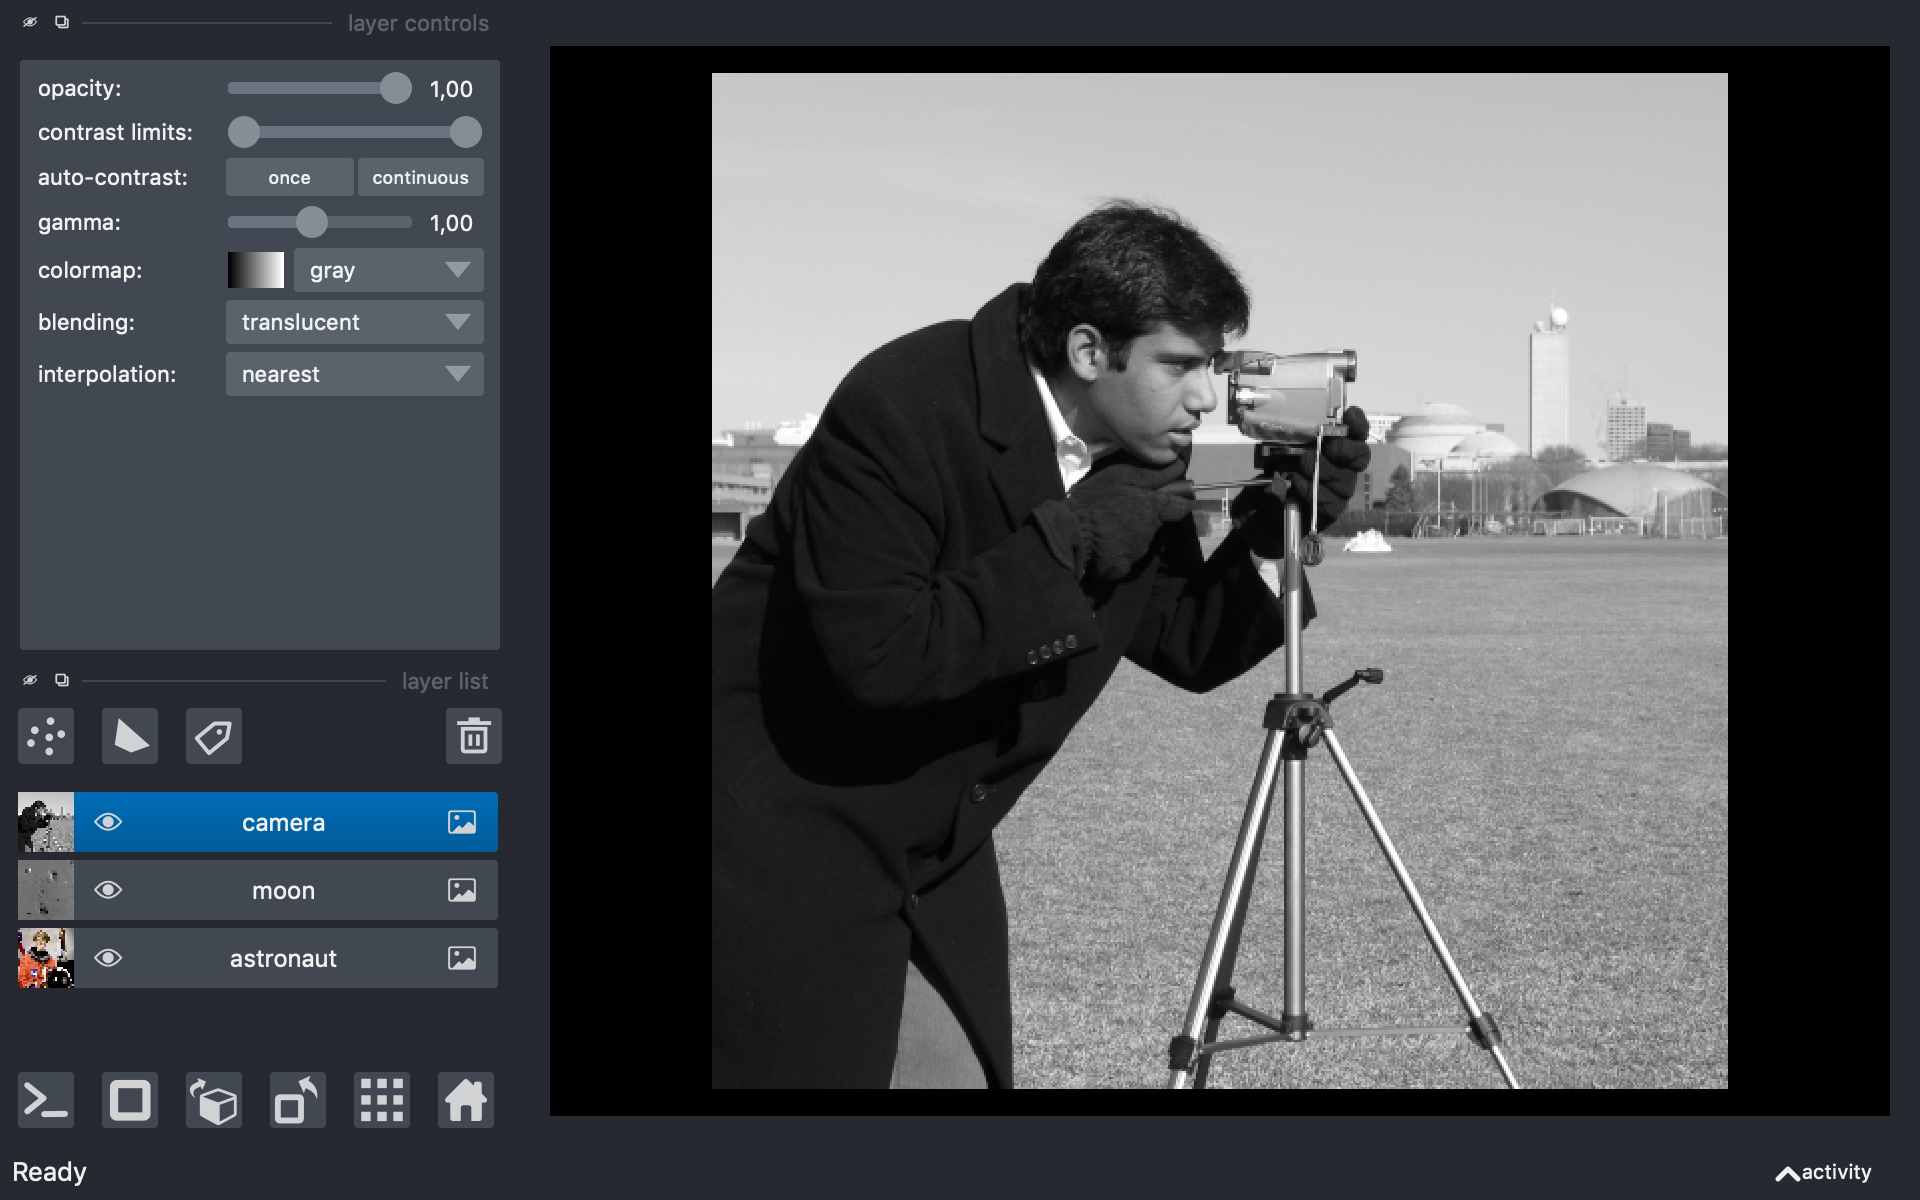

In [33]:
nbscreenshot(viewer)

In [34]:
viewer.layers

[<Image layer 'astronaut' at 0x13a9bbe50>, <Image layer 'moon' at 0x1310d5d60>, <Image layer 'camera' at 0x1310f9040>]

In [35]:
viewer.layers[0]

<Image layer 'astronaut' at 0x13a9bbe50>

In [36]:
points = np.array([[100, 100], [200, 200], [300, 100]])
viewer.add_points(points, size=30)

/Users/fernandes/anaconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


<Points layer 'points' at 0x13a578640>

In [37]:
viewer.layers[0].opacity = 0.3

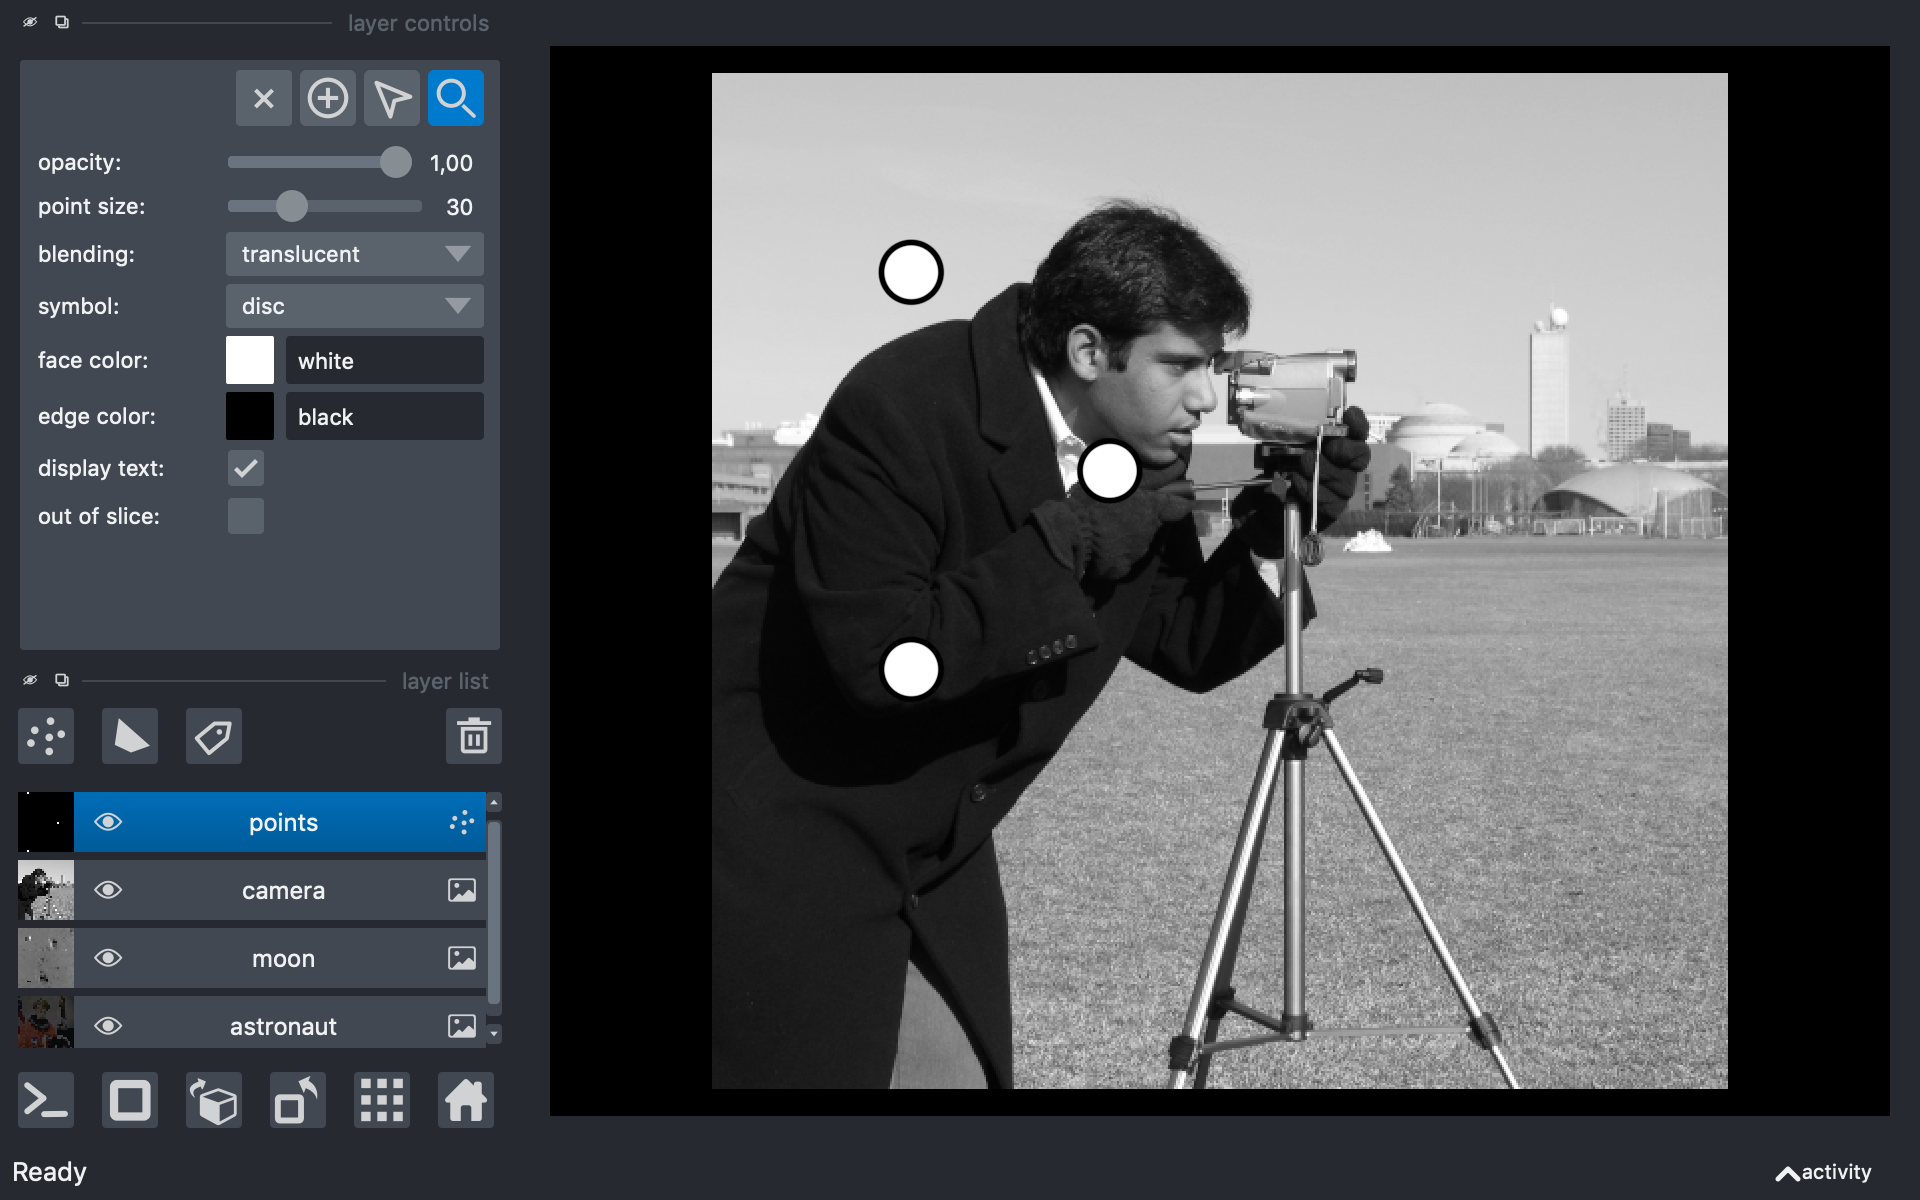

In [38]:
nbscreenshot(viewer)

In [39]:
viewer.layers.pop(0)

<Image layer 'astronaut' at 0x13a9bbe50>

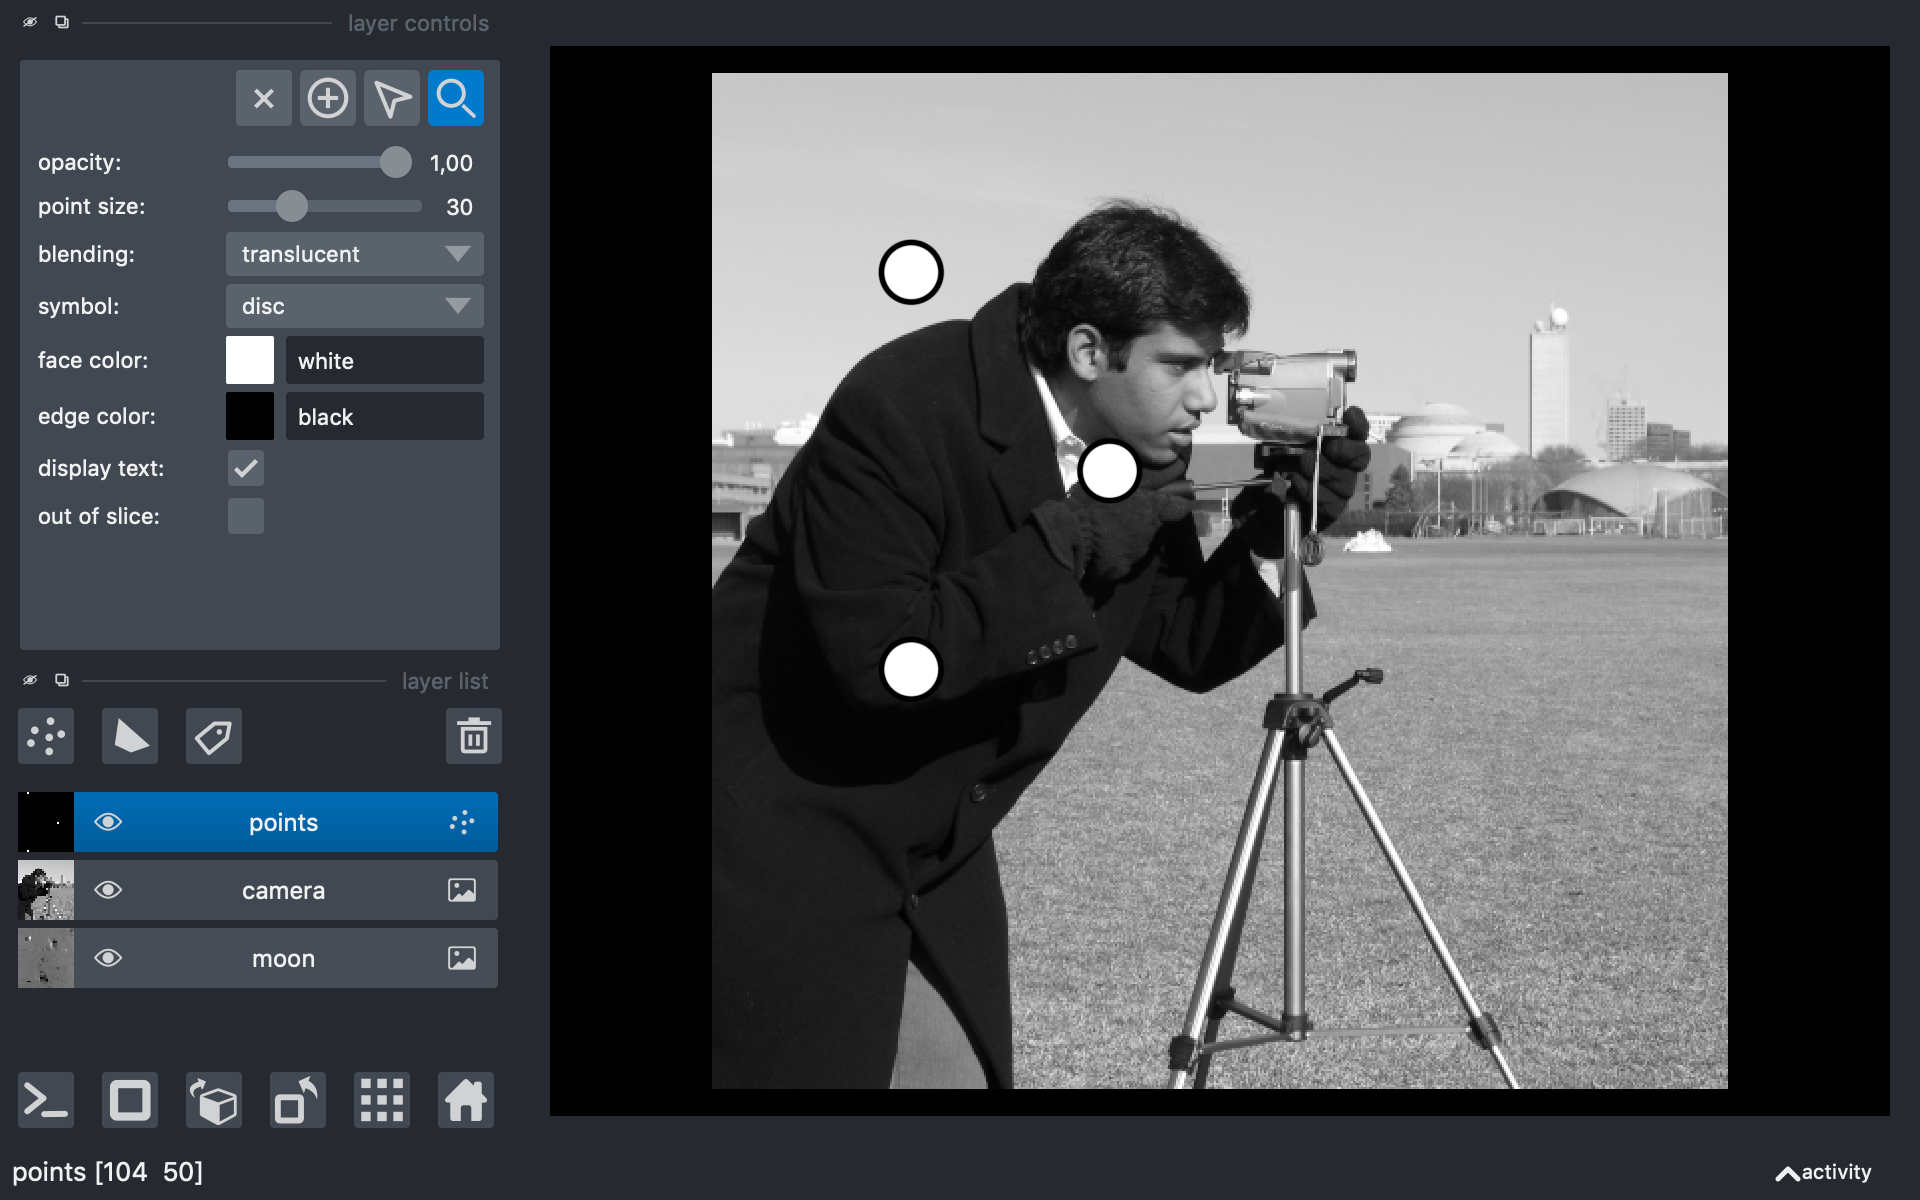

In [40]:
nbscreenshot(viewer)

In [41]:
blobs = np.stack(
    [
        data.binary_blobs(
            length=512, blob_size_fraction=0.05, n_dim=2, volume_fraction=f
        )
        for f in np.linspace(0.05, 0.5, 10)
    ],
    axis=0,
).astype(float)
viewer.add_image(blobs, name='blobs', opacity=0.5, colormap='red')

<Image layer 'blobs' at 0x13369a0d0>

In [43]:
viewer.layers.pop('points')

<Points layer 'points' at 0x13a578640>

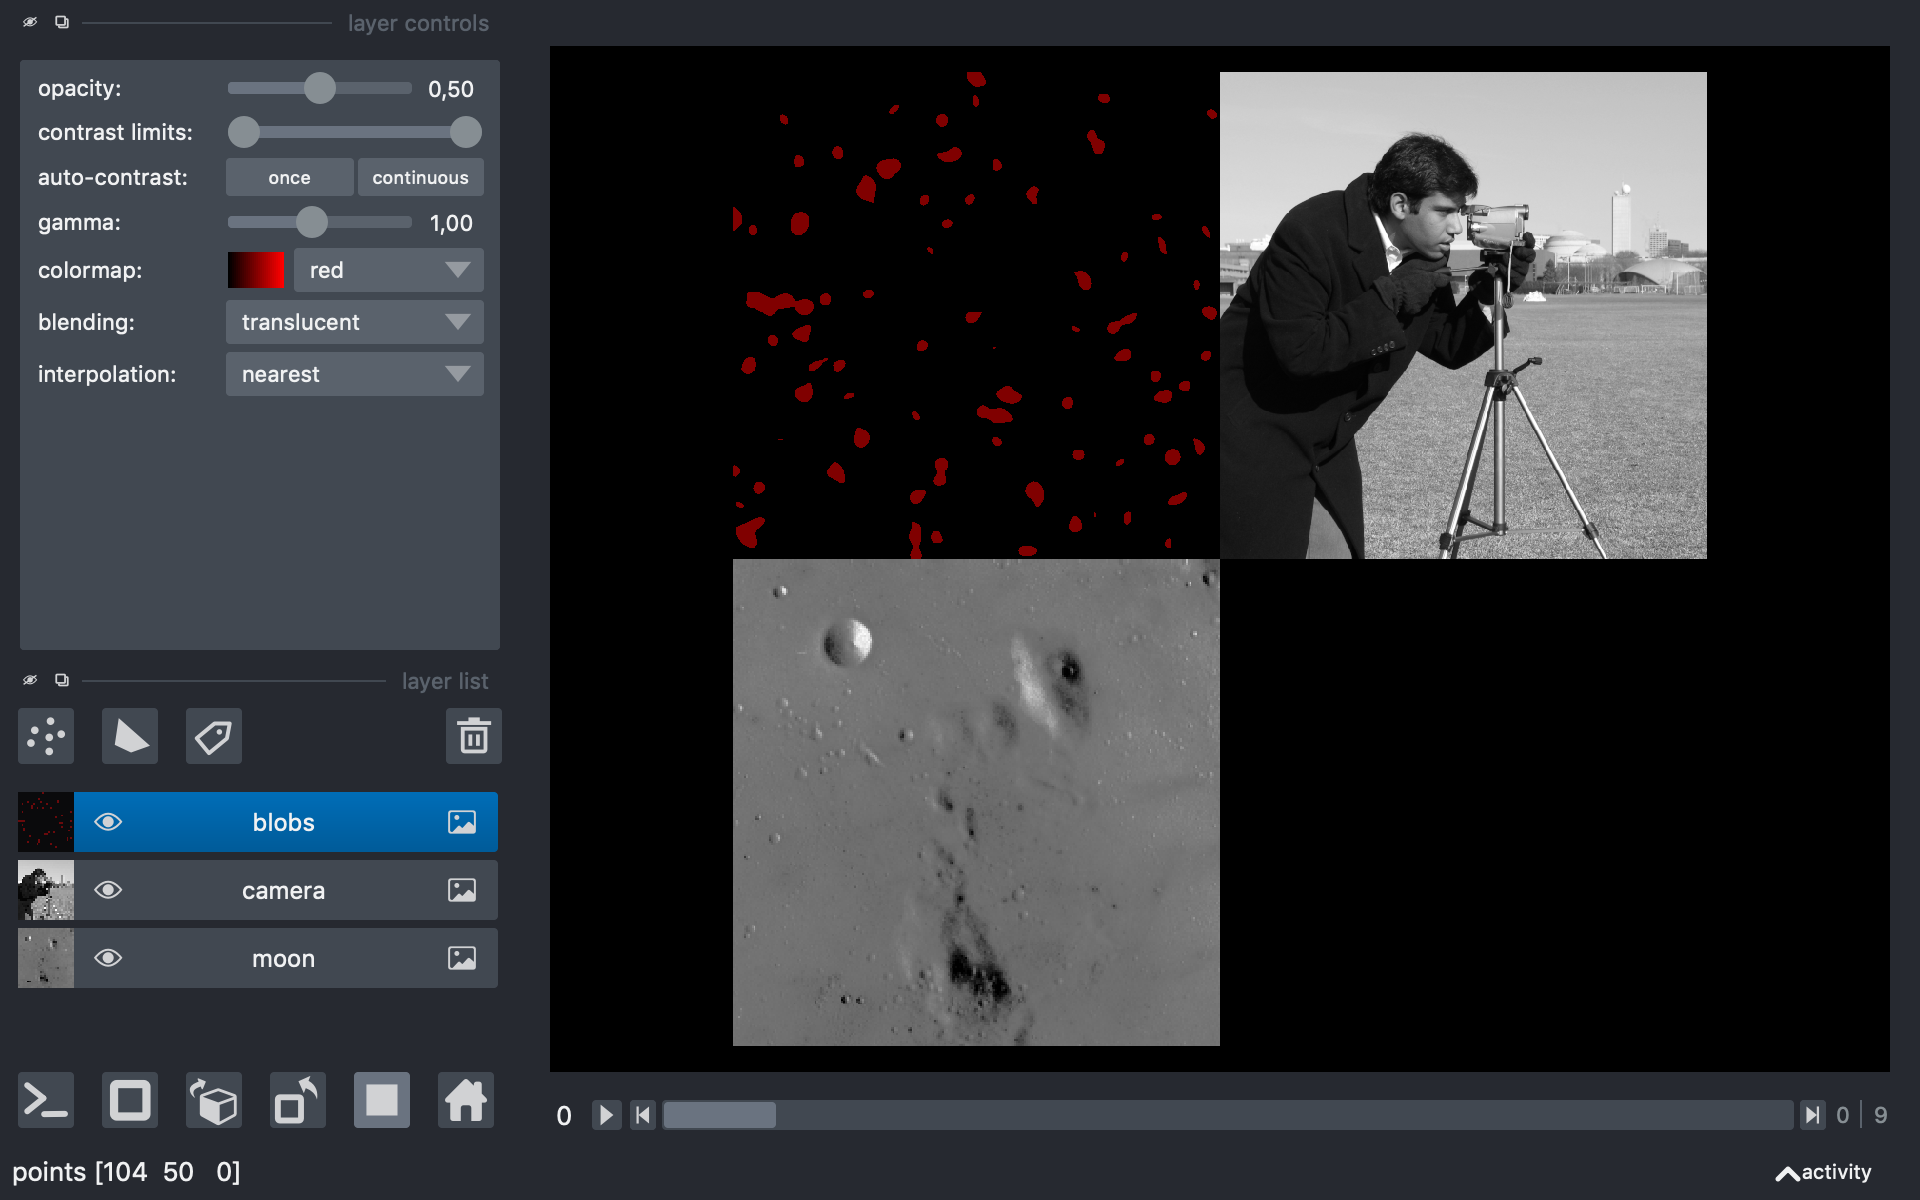

In [44]:
nbscreenshot(viewer)

In [48]:
viewer.close()

In [49]:

from scipy import ndimage as ndi

blobs = data.binary_blobs(length=128, volume_fraction=0.1, n_dim=3)
viewer = napari.view_image(blobs.astype(float), name='blobs')
labeled = ndi.label(blobs)[0]
viewer.add_labels(labeled, name='blob ID')

/Users/fernandes/anaconda3/envs/napari-env/lib/python3.9/site-packages/napari_tools_menu/__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Labels layer 'blob ID' at 0x13a625ac0>

In [50]:
# change the viewer theme
viewer.theme = 'light'